# Part 1

In [1]:
# Import of different libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# To encode categorical features
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image

In [2]:
df_orders = pd.read_csv('data/olist_orders_dataset.csv', low_memory = False)
df_products = pd.read_csv('data/olist_products_dataset.csv', low_memory = False)
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv', low_memory = False)
df_orders_payment = pd.read_csv('data/olist_order_payments_dataset.csv', low_memory = False)
df_customers = pd.read_csv('data/olist_customers_dataset.csv', low_memory = False)
df_product_category = pd.read_csv('data/product_category_name_translation.csv', low_memory = False)
df_orders_review = pd.read_csv('data/olist_order_reviews_dataset.csv', low_memory = False)
df_orders_items = pd.read_csv('data/olist_order_items_dataset.csv', low_memory = False)

![title](images/olist_data.png) 

In [3]:
df_items_product = pd.merge(df_orders_items, df_products, on= 'product_id', how = 'left')
df_items_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [4]:
df_payments_orders = pd.merge(df_orders_payment, df_orders, on='order_id', how ='left')
df_payments_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00


In [5]:
df_payments_order_customer = pd.merge(df_payments_orders, df_customers, on='customer_id', how='left' )
df_payments_order_customer.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [6]:
df_payments_order_customer_review = pd.merge(df_payments_order_customer, df_orders_review, on='order_id', how='left')
df_payments_order_customer_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


In [7]:
df_payments_order_customer_review_products = pd.merge(df_items_product, df_payments_order_customer_review, 
                                                      on = 'order_id', how='left')
df_payments_order_customer_review_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [8]:
df_merged = pd.merge(df_payments_order_customer_review_products, df_sellers, on='seller_id', how='left')
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR


In [9]:
df_merged.shape

(118318, 39)

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 39 columns):
order_id                         118318 non-null object
order_item_id                    118318 non-null int64
product_id                       118318 non-null object
seller_id                        118318 non-null object
shipping_limit_date              118318 non-null object
price                            118318 non-null float64
freight_value                    118318 non-null float64
product_category_name            116609 non-null object
product_name_lenght              116609 non-null float64
product_description_lenght       116609 non-null float64
product_photos_qty               116609 non-null float64
product_weight_g                 118298 non-null float64
product_length_cm                118298 non-null float64
product_height_cm                118298 non-null float64
product_width_cm                 118298 non-null float64
payment_sequential               118315 n

# Part 2

In [11]:
df_merged['price_group'] = (df_merged['price']/100).astype(int)
df_merged['installment_value'] = round(df_merged['payment_value']/df_merged['payment_installments'],2)
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,0,12.89
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1,72.68


In [12]:
pd.set_option('display.max_columns', 500)
df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,price_group,installment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP,0,36.10
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,3471,sao paulo,SP,2,86.61
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,37564,borda da mata,MG,1,43.37
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,14403,franca,SP,0,12.89
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,87900,loanda,PR,1,72.68
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0,1.0,boleto,1.0,34.59,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00,85c835d128beae5b4ce8602c491bf385,38017.0,uberaba,MG,5e4e50af3b7960b7a10d86ec869509e8,4.0,NaN,NaN,2017-05-23 00:00:00,2017-05-24 19:00:09,14091,ribeirao pr

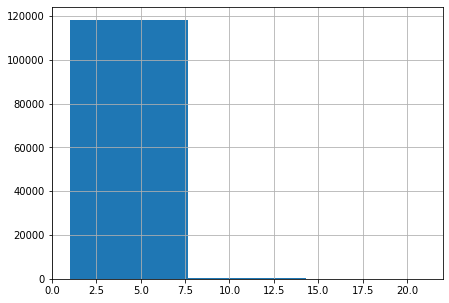

In [13]:
df_merged['order_item_id'].hist(bins = 3, figsize = (7,5))
plt.show()

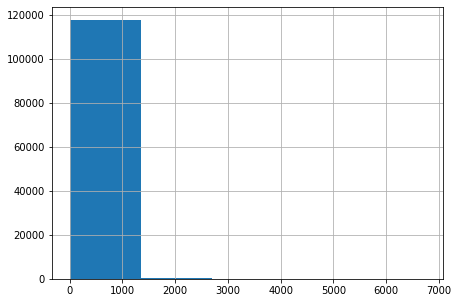

In [14]:
df_merged['price'].hist(bins = 5, figsize = (7,5))
plt.show()

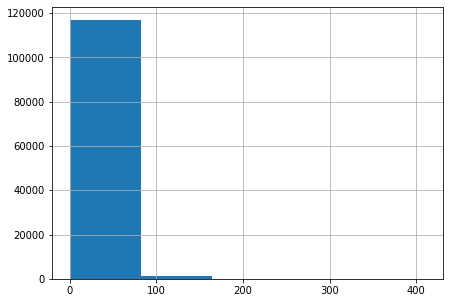

In [15]:
df_merged['freight_value'].hist(bins = 5, figsize = (7,5))
plt.show()

In [16]:
df_merged['product_category_name'].value_counts()

cama_mesa_banho                                  11990
beleza_saude                                     10033
esporte_lazer                                     9005
moveis_decoracao                                  8833
informatica_acessorios                            8151
utilidades_domesticas                             7380
relogios_presentes                                6213
telefonia                                         4726
ferramentas_jardim                                4590
automotivo                                        4400
brinquedos                                        4281
cool_stuff                                        3999
perfumaria                                        3589
bebes                                             3204
eletronicos                                       2847
papelaria                                         2625
fashion_bolsas_e_acessorios                       2170
pet_shop                                          2030
moveis_esc

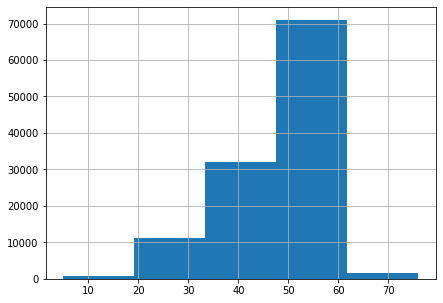

In [17]:
df_merged['product_name_lenght'].hist(bins = 5, figsize = (7,5))
plt.show()

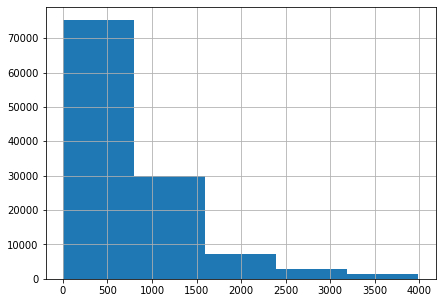

In [18]:
df_merged['product_description_lenght'].hist(bins = 5, figsize = (7,5))
plt.show()

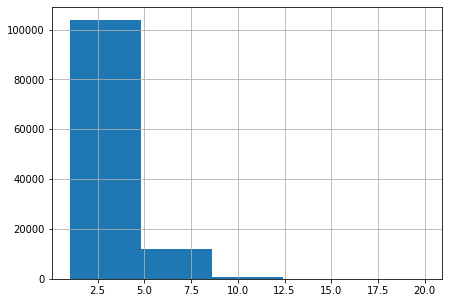

In [19]:
df_merged['product_photos_qty'].hist(bins = 5, figsize = (7,5))
plt.show()

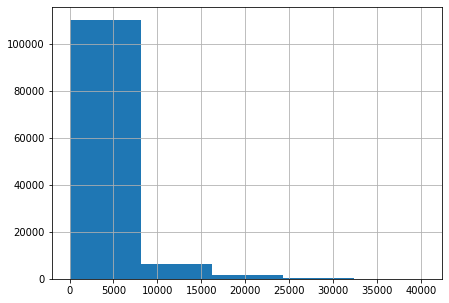

In [20]:
df_merged['product_weight_g'].hist(bins = 5, figsize = (7,5))
plt.show()

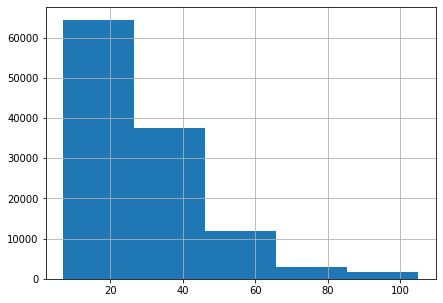

In [21]:
df_merged['product_length_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

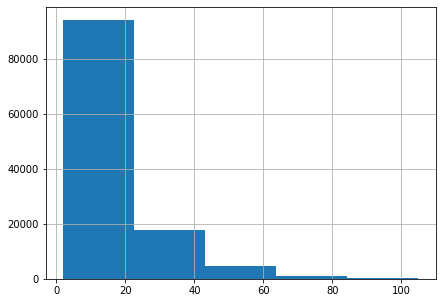

In [22]:
df_merged['product_height_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

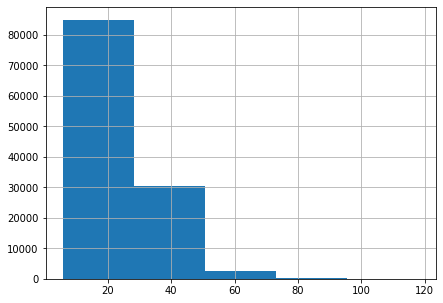

In [23]:
df_merged['product_width_cm'].hist(bins = 5, figsize = (7,5))
plt.show()

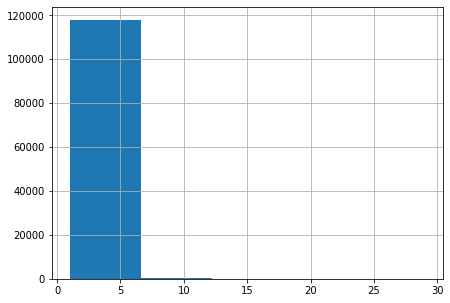

In [24]:
df_merged['payment_sequential'].hist(bins = 5, figsize = (7,5))
plt.show()

In [25]:
df_merged['payment_type'].value_counts()

credit_card    87266
boleto         23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

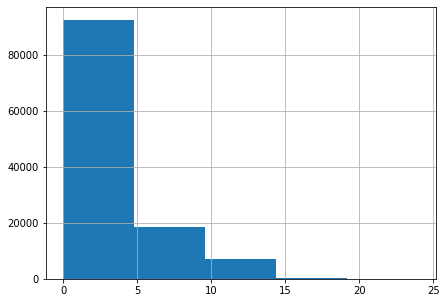

In [26]:
df_merged['payment_installments'].hist(bins = 5, figsize = (7,5))
plt.show()

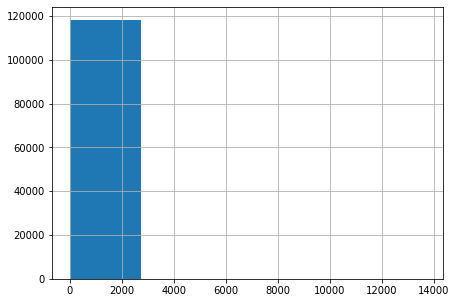

In [27]:
df_merged['payment_value'].hist(bins = 5, figsize = (7,5))
plt.show()

In [28]:
df_merged['order_status'].value_counts()

delivered      115728
shipped          1255
canceled          570
processing        376
invoiced          376
unavailable         7
approved            3
Name: order_status, dtype: int64

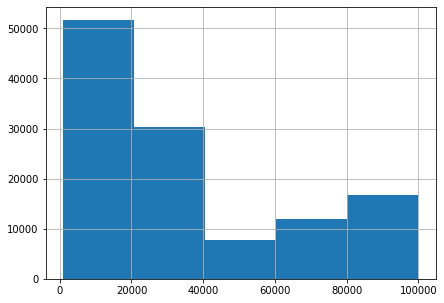

In [29]:
df_merged['customer_zip_code_prefix'].hist(bins = 5, figsize = (7,5))
plt.show()

In [30]:
df_merged['customer_city'].value_counts()

sao paulo                       18728
rio de janeiro                   8261
belo horizonte                   3274
brasilia                         2484
curitiba                         1816
campinas                         1743
porto alegre                     1667
salvador                         1537
guarulhos                        1404
sao bernardo do campo            1121
niteroi                          1061
santo andre                       918
osasco                            900
goiania                           874
santos                            844
sao jose dos campos               823
fortaleza                         762
sorocaba                          734
recife                            713
jundiai                           687
florianopolis                     684
ribeirao preto                    611
nova iguacu                       519
belem                             517
contagem                          515
juiz de fora                      496
barueri     

In [31]:
df_merged['customer_state'].value_counts()

SP    49865
RJ    15425
MG    13718
RS     6539
PR     5988
SC     4319
BA     4069
DF     2500
GO     2453
ES     2351
PE     1903
CE     1556
MT     1128
PA     1124
MS      856
MA      849
PB      640
PI      574
RN      571
AL      462
SE      397
TO      339
RO      286
AM      172
AC       95
AP       84
RR       52
Name: customer_state, dtype: int64

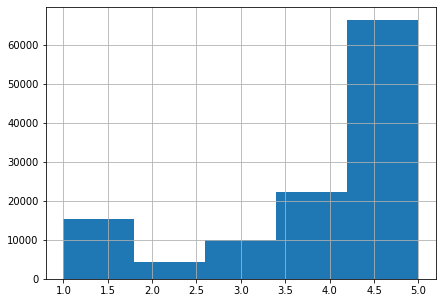

In [32]:
df_merged['review_score'].hist(bins = 5, figsize = (7,5))
plt.show()

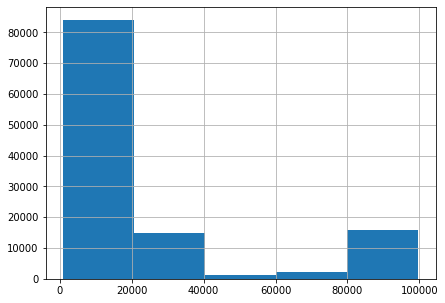

In [33]:
df_merged['seller_zip_code_prefix'].hist(bins = 5, figsize = (7,5))
plt.show()

In [34]:
df_merged['seller_city'].value_counts()

sao paulo                                   29294
ibitinga                                     8375
curitiba                                     3161
santo andre                                  3149
sao jose do rio preto                        2693
belo horizonte                               2688
rio de janeiro                               2535
guarulhos                                    2456
ribeirao preto                               2374
maringa                                      2293
piracicaba                                   2036
itaquaquecetuba                              1761
campinas                                     1459
salto                                        1400
praia grande                                 1385
campo limpo paulista                         1255
guariba                                      1186
sao bernardo do campo                        1185
jacarei                                      1011
limeira                                       973


In [35]:
df_merged['seller_state'].value_counts()

SP    84384
MG     9314
PR     9097
RJ     5036
SC     4271
RS     2294
DF      949
BA      700
GO      550
PE      465
MA      410
ES      390
MT      147
CE      103
MS       60
RN       56
PB       44
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: seller_state, dtype: int64

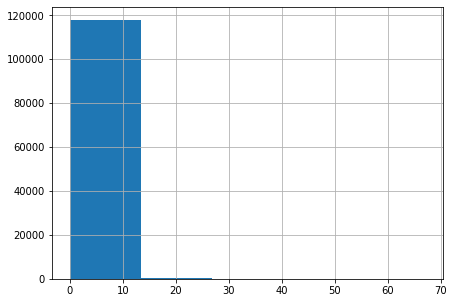

In [36]:
df_merged['price_group'].hist(bins = 5, figsize = (7,5))
plt.show()

In [37]:
df_merged.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score,seller_zip_code_prefix,price_group,installment_value
count,118318.000000,118318.000000,118318.000000,116609.000000,116609.000000,116609.000000,118298.000000,118298.000000,118298.000000,118298.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118318.000000,118318.000000,118315.00
mean,1.196530,120.649109,20.032587,48.767402,785.950441,2.205113,2112.302803,30.264865,16.619994,23.074896,1.094062,2.943498,172.575651,35051.681579,4.014554,24442.245322,0.710872,inf
std,0.699467,184.107686,15.836559,10.033526,652.571474,1.717418,3786.673988,16.188992,13.453771,11.749216,0.728555,2.778022,267.104661,29824.811223,1.400186,27572.843192,1.808538,NaN
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1003.000000,1.000000,1001.000000,0.000000,0.00
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,11310.000000,3.000000,6429.000000,0.000000,27.50
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.200000,24310.000000,5.000000,13660.000000,0.000000,53.62
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.260000,58640.000000,5.000000,27972.000000,1.000000,97.18
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99990.000000,5.000000,99730.000000,67.000000,inf
